In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the dataset

iris_data = pd.read_csv("iris.csv")

In [3]:
# Display basic dataset information

print(iris_data.head(10))
print(iris_data.info())
print(iris_data.describe())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sep

In [4]:
# Check for missing values

print(iris_data.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


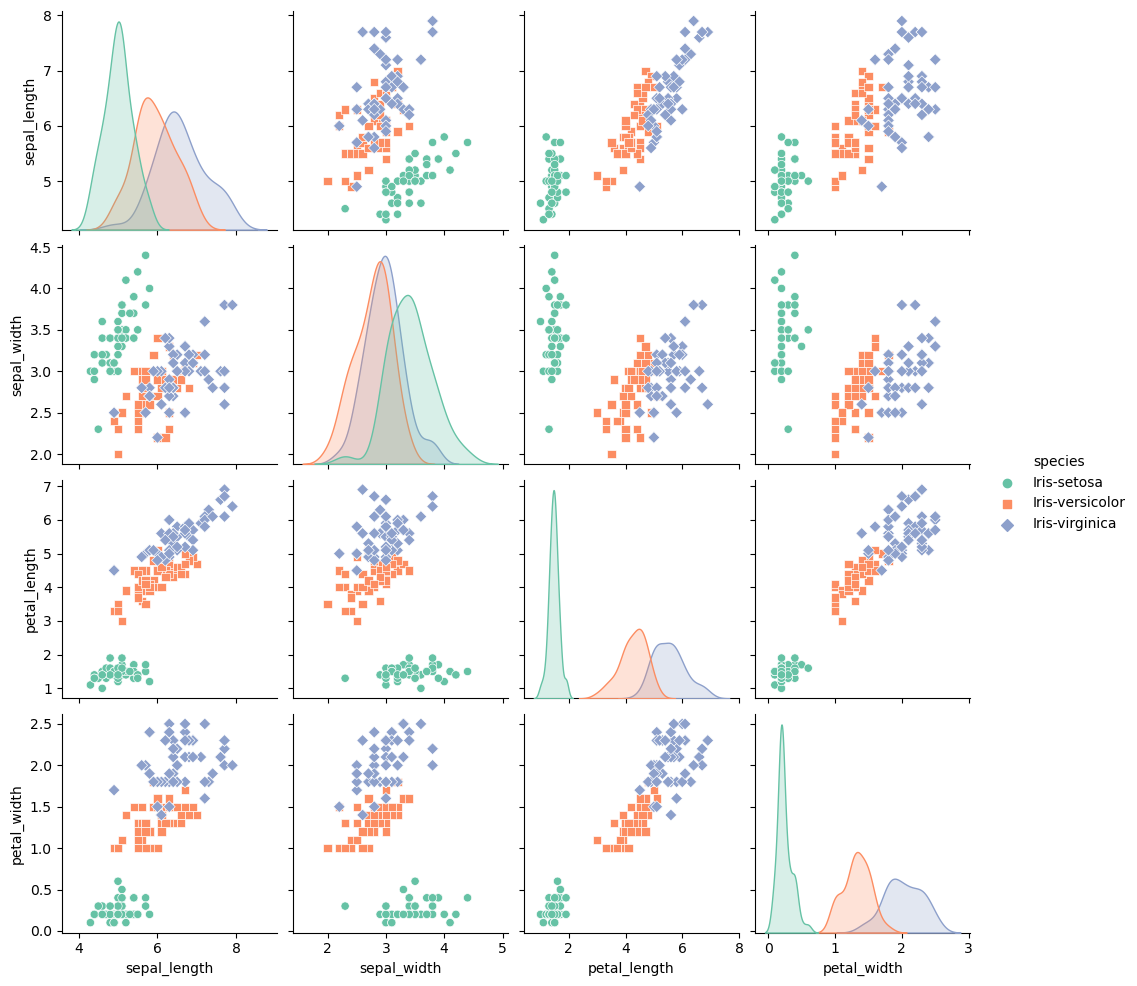

In [5]:
# Pairplot Visualization

sns.pairplot(iris_data, hue="species", palette="Set2", diag_kind="kde", markers=["o", "s", "D"])
plt.show()

C:\Users\AQUIB HUSAIN\AppData\Local\Temp\ipykernel_13100\1306296112.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_data.corr(), annot=True, fmt=".2f", cmap='Blues', cbar=True)


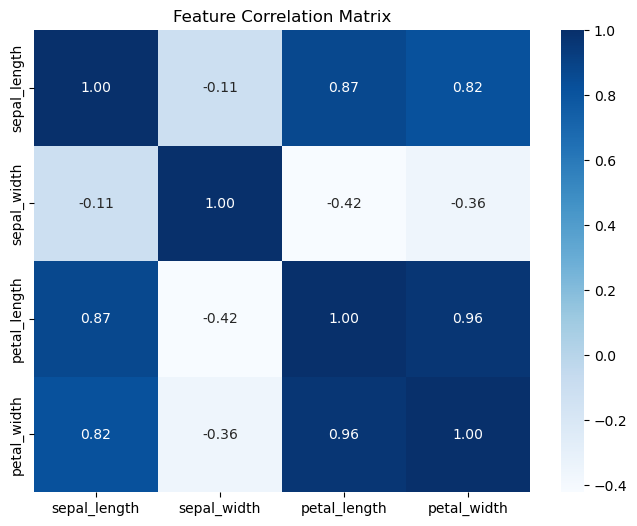

In [6]:
# Correlation heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(iris_data.corr(), annot=True, fmt=".2f", cmap='Blues', cbar=True)
plt.title('Feature Correlation Matrix')
plt.show()

In [7]:
# Data preparation for modeling

iris_data['species_encoded'] = pd.factorize(iris_data['species'])[0]
X = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_data['species_encoded']

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Random Forest Classifier

rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [9]:
# Model evaluation
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Random Forest Classifier Accuracy: {accuracy:.2f}%")

Random Forest Classifier Accuracy: 100.00%
